In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [2]:
eyes = cv.imread('eyes.jpg')

In [3]:
eye_gray = cv.cvtColor(eyes,cv.COLOR_BGR2GRAY)

In [4]:
# Suavizamos
eyes_gray = cv.GaussianBlur(eye_gray,ksize=(3,3),sigmaX=1)

In [5]:
cv.imshow('Ojos Grayscale Suavizados',eyes_gray)
cv.waitKey(0)
cv.destroyAllWindows()

# Hough Circles

## Pupilas

In [167]:
cop = eyes_gray.copy()
#cop_norm = cv.equalizeHist(eyes_gray)

In [174]:
pupilas_img = cop.copy()
pupilas_circulos = cv.HoughCircles(pupilas_img,cv.HOUGH_GRADIENT,dp=1,
                                 minDist=100,
                                   param1=200, #higher threshold for canny, lower = param/2
                                   param2=5, #min count
                                 minRadius=2,maxRadius=20)

In [175]:
pupilas_circulos = np.uint16(np.around(pupilas_circulos))
for i in pupilas_circulos[0,:]:
    # Dibujamos el círculo externo
    cv.circle(pupilas_img,(i[0],i[1]),i[2],(255,0,0),2)
    # Dibujamos el centro del círculo
    cv.circle(pupilas_img,(i[0],i[1]),2,(255,0,0),3)
cv.imshow('detected circles',pupilas_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [119]:
pupilas_circulos

array([[[130, 506,  21],
        [468, 516,  21],
        [356,  98,  21],
        [534, 446,  16],
        [486,  88,  21],
        [146, 188,  19],
        [ 56, 176,  17],
        [520, 214,  16],
        [ 58,  76,  18],
        [372, 306,  18],
        [152,  78,  14],
        [188, 380,  16],
        [ 54, 288,  15],
        [ 52, 390,  11]]], dtype=uint16)

## Iris

In [78]:
cop_norm = cv.equalizeHist(eyes_gray)

In [93]:
cop = cop_norm.copy()
iris_circles = cv.HoughCircles(cop,cv.HOUGH_GRADIENT,dp=1,
                                 minDist=85,param1=85,param2=20,
                                 minRadius=28,maxRadius=33)

In [94]:
iris_circles = np.uint16(np.around(iris_circles))
for i in iris_circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(cop,(i[0],i[1]),i[2],(255,0,0),2)
    # Dibujamos el centro del círculo
    cv.circle(cop,(i[0],i[1]),2,(255,0,0),3)
cv.imshow('detected circles',cop)
cv.waitKey(0)
cv.destroyAllWindows()

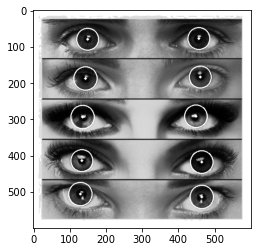

In [98]:
plt.imshow(cop,cmap='gray')
plt.show()